In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [25]:
np.random.seed(255) 
tf.set_random_seed(255)

In [26]:
mean1 = [50, 50]
cov1 = [[5, 0], [0, 5]]

mean2 = [100, 10]
cov2 = [[5, 2], [2, 5]]

mean3 = [150, 25]
cov3 = [[6, 1], [1, 2]]

arr1=np.random.multivariate_normal(mean1, cov1, 2048)
arr2=np.random.multivariate_normal(mean2, cov2, 2048)
arr3=np.random.multivariate_normal(mean3, cov3, 2048)

x1, y1 = arr1.T
x2, y2 = arr2.T
x3, y3 = arr3.T

arr_final = np.concatenate((arr1, arr2, arr3))
np.random.shuffle(arr_final)

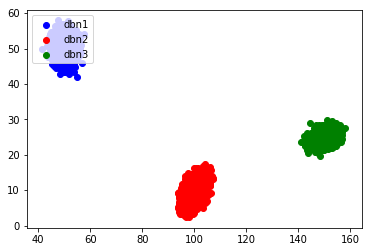

In [27]:
plt.scatter(x1,y1, c='b', marker='o', label='dbn1')
plt.scatter(x2, y2, c='r', marker='o', label='dbn2')
plt.scatter(x3, y3, c='g', marker='o', label='dbn3')
plt.legend(loc='upper left')
plt.show()

In [28]:
num_steps=1500 #No of times generator/discriminator is updated before it moves onto discriminator/generator?
learning_rate=0.0002
batch_size=128 #So that you don't have to load all your data at once
#Network Parameters
image_dim=2
gen_hnode_dim=128
dis_hnode_dim=128
noise_dim=2

#Initializing the weight parameters:
# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

drop_out_rate=tf.placeholder(tf.float32)
gen_input = tf.placeholder(tf.float32, shape=[None, noise_dim], name='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, image_dim], name='disc_input')

In [29]:
weights={'gen_ilayer':tf.Variable(glorot_init([noise_dim,gen_hnode_dim])),
         'gen_olayer':tf.Variable(glorot_init([gen_hnode_dim,image_dim])),
         'dis_ilayer':tf.Variable(glorot_init([image_dim,dis_hnode_dim])),
         'dis_olayer':tf.Variable(glorot_init([dis_hnode_dim,1]))}
biases={'gen_ilayer':tf.Variable(tf.zeros([gen_hnode_dim])),
         'gen_olayer':tf.Variable(tf.zeros([image_dim])),
         'dis_ilayer':tf.Variable(tf.zeros([dis_hnode_dim])),
         'dis_olayer':tf.Variable(tf.zeros([1]))}

In [30]:
def generator(data,dropout_rate):       
    l1=tf.add(tf.matmul(data,weights['gen_ilayer']),biases['gen_ilayer'])
    l1=tf.nn.relu(l1)    
    l1 = tf.layers.dropout(l1, dropout_rate, training=True)
    output=tf.add(tf.matmul(l1,weights['gen_olayer']),biases['gen_olayer'])
    output = tf.nn.relu(output)
    return output

In [31]:
def discriminator(data,dropout_rate):
    l1=tf.add(tf.matmul(data,weights['dis_ilayer']),biases['dis_ilayer'])
    l1=tf.nn.relu(l1)
    output=tf.add(tf.matmul(l1,weights['dis_olayer']),biases['dis_olayer'])
    output = tf.nn.sigmoid(output)
    return output

In [32]:
gen_samples=generator(gen_input,drop_out_rate)   
avg=10
for i in range(avg):
    gen_samples += generator(gen_input,drop_out_rate)
gen_sample=gen_samples/(avg+1.)

disc_real=discriminator(disc_input,drop_out_rate)
disc_fake=discriminator(gen_sample,drop_out_rate)

beta=0.01
eps=0.001
# Build Loss
gen_loss = -tf.reduce_mean(tf.log(disc_fake+eps))
disc_loss = -tf.reduce_mean(tf.log(disc_real+eps) + tf.log(1. - disc_fake+eps))

regularizers_gen = tf.nn.l2_loss(weights['gen_olayer']) + tf.nn.l2_loss(weights['gen_ilayer'])
regularizers_dis = tf.nn.l2_loss(weights['dis_olayer']) + tf.nn.l2_loss(weights['dis_ilayer'])

gen_loss = tf.reduce_mean(gen_loss + beta * regularizers_gen)
disc_loss = tf.reduce_mean(disc_loss + beta * regularizers_dis)

#Building optimizer for generator and discriminator
optimizer_gen = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimizer_disc = tf.train.AdamOptimizer(learning_rate=learning_rate)

generator_var=[weights['gen_ilayer'],weights['gen_olayer'],
               biases['gen_ilayer'],biases['gen_olayer']]

discriminator_var=[weights['dis_ilayer'],weights['dis_olayer'],
               biases['dis_ilayer'],biases['dis_olayer']]
train_gen=optimizer_gen.minimize(gen_loss,var_list=generator_var)
train_dis=optimizer_disc.minimize(disc_loss,var_list=discriminator_var)

init = tf.global_variables_initializer()

In [33]:
def plot(samples):
    fig = plt.figure()
    plt.scatter(x1,y1, c='y', marker='o', label='dbn1')
    plt.scatter(x2, y2, c='b', marker='v', label='dbn2')
    plt.scatter(x3, y3, c='g', marker='s', label='dbn3')
    x4, y4 = samples.T
    plt.scatter(x4, y4, c='r', marker='x', label='generated')
    return fig

Step 0: Generator Loss: 2.083561, Discriminator Loss: 1.956302


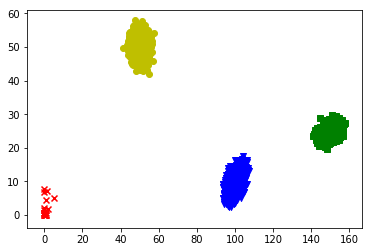

Step 1: Generator Loss: 2.241014, Discriminator Loss: 1.864323


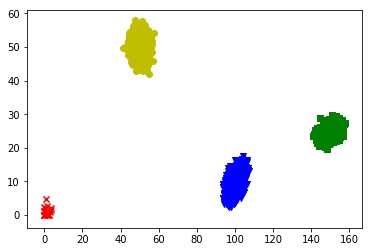

Step 100: Generator Loss: 2.192663, Discriminator Loss: 1.645839


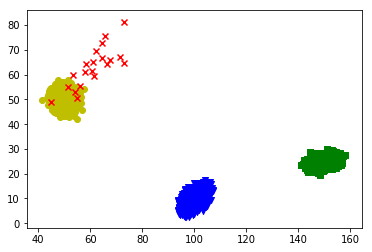

Step 200: Generator Loss: 1.508806, Discriminator Loss: 1.300744


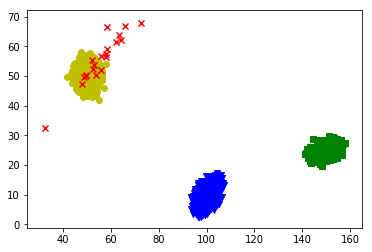

Step 300: Generator Loss: 1.503212, Discriminator Loss: 1.232004


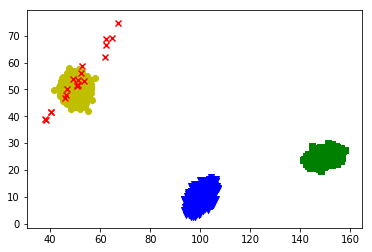

Step 400: Generator Loss: 1.517013, Discriminator Loss: 1.190493


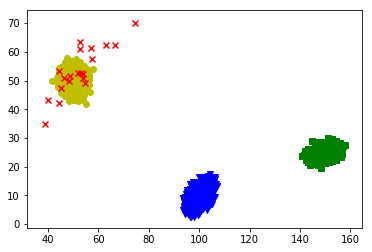

Step 500: Generator Loss: 1.510183, Discriminator Loss: 1.360167


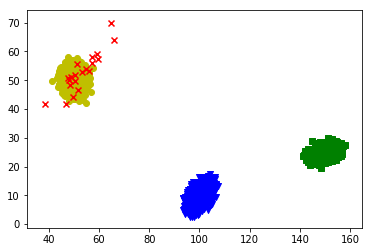

Step 600: Generator Loss: 1.425951, Discriminator Loss: 1.072801


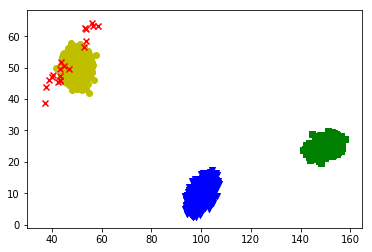

Step 700: Generator Loss: 1.510526, Discriminator Loss: 1.005971


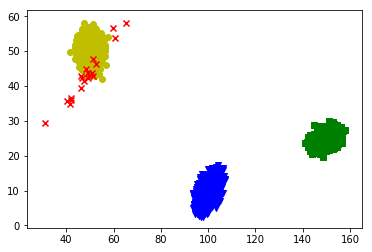

Step 800: Generator Loss: 1.794286, Discriminator Loss: 0.841559


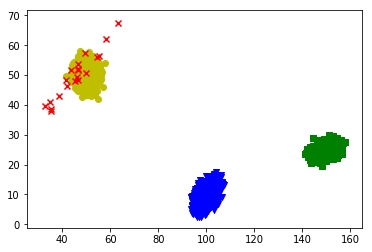

Step 900: Generator Loss: 1.372997, Discriminator Loss: 1.100205


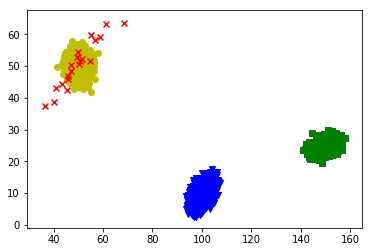

Step 1000: Generator Loss: 1.322622, Discriminator Loss: 1.360517


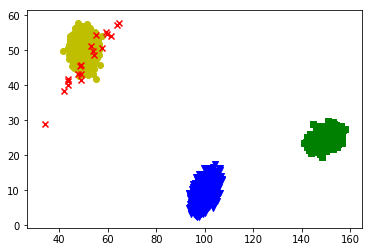

Step 1100: Generator Loss: 1.434046, Discriminator Loss: 1.025621


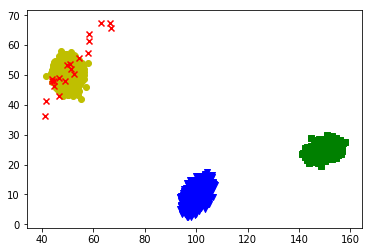

Step 1200: Generator Loss: 1.462462, Discriminator Loss: 1.016644


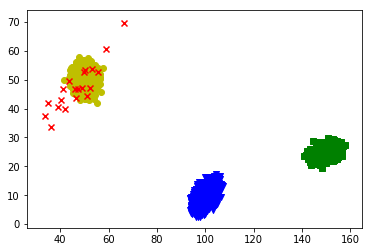

Step 1300: Generator Loss: 1.422469, Discriminator Loss: 1.155104


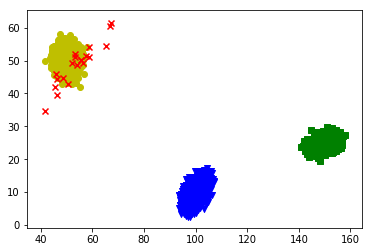

Step 1400: Generator Loss: 1.556441, Discriminator Loss: 0.948178


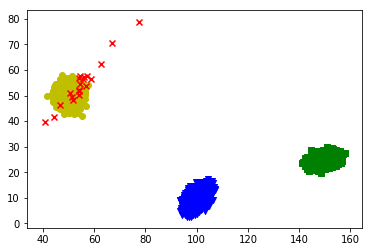

In [34]:
config = tf.ConfigProto(device_count = {'GPU': 1})
sess = tf.Session(config=config)

sess.run(init)
#data_tf = tf.convert_to_tensor(arr_final, np.float32)
for i in range(num_steps):
    j=0
    while(j<len(arr_final)):
        start=j
        end=batch_size+j
        batch_x=arr_final[start:end]
        z = np.random.normal(0, 1., size=[batch_size, noise_dim])
        _, dl = sess.run([train_dis, disc_loss], feed_dict={disc_input: batch_x, gen_input:z, drop_out_rate:0.4})
        _, gl = sess.run([train_gen, gen_loss], feed_dict={gen_input:z, drop_out_rate:0.7})
        #print(j)
        j+=batch_size
    if i % 100 == 0 or i == 1:
        print('Step %i: Generator Loss: %f, Discriminator Loss: %f' % (i, gl, dl))
        z=np.random.normal(0, 1., size=[20, noise_dim])
        samples = sess.run(gen_test, feed_dict={gen_input: z,drop_out_rate:0.7})
        fig = plot(samples)
        plt.show()

<Figure size 432x288 with 0 Axes>

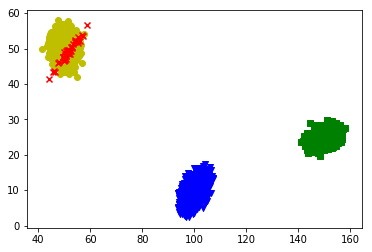

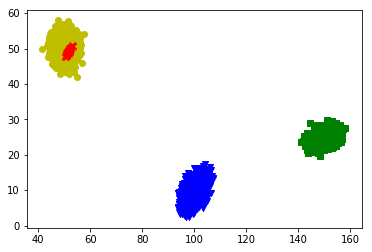

In [35]:
n=50
z = np.random.normal(0, 1., size=[n, noise_dim])
g=sess.run(gen_sample, feed_dict={gen_input: z,drop_out_rate:0.7})
f=np.copy(g)
for i in range(10):
    g += sess.run(gen_sample, feed_dict={gen_input: z,drop_out_rate:0.7})
g=g/11.0
plt.figure()
fig = plot(f)
plt.show()
#plt.figure()
fig = plot(g)
plt.show()